# Demographic Model QC
First we load the necessary packages.

In [1]:
# Import packages.
import demes
import demesdraw
from matplotlib import pyplot as plt
import msprime

Next, I define a helper function for plotting.

In [2]:
# LaTeX plotting helper function provided by Jack Walton (https://jwalton.info/Embed-Publication-Matplotlib-Latex/).
def set_size(width_pt=452, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27
    # Golden ratio to set aesthetic figure height.
    golden_ratio = (5**.5 - 1) / 2
    # Figure width in inches.
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches.
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])
    return (fig_width_in, fig_height_in)

## IUA Model of Human Evolution from Racimo et al., 2017
This is the main demographic model used in the analyses.

In [3]:
# Load the demes graph.
iua_graph = demes.load('./yamls/iua_f_0.02.yaml')
# Convert the graph to a demographic object.
iua_demo = msprime.Demography.from_demes(iua_graph)

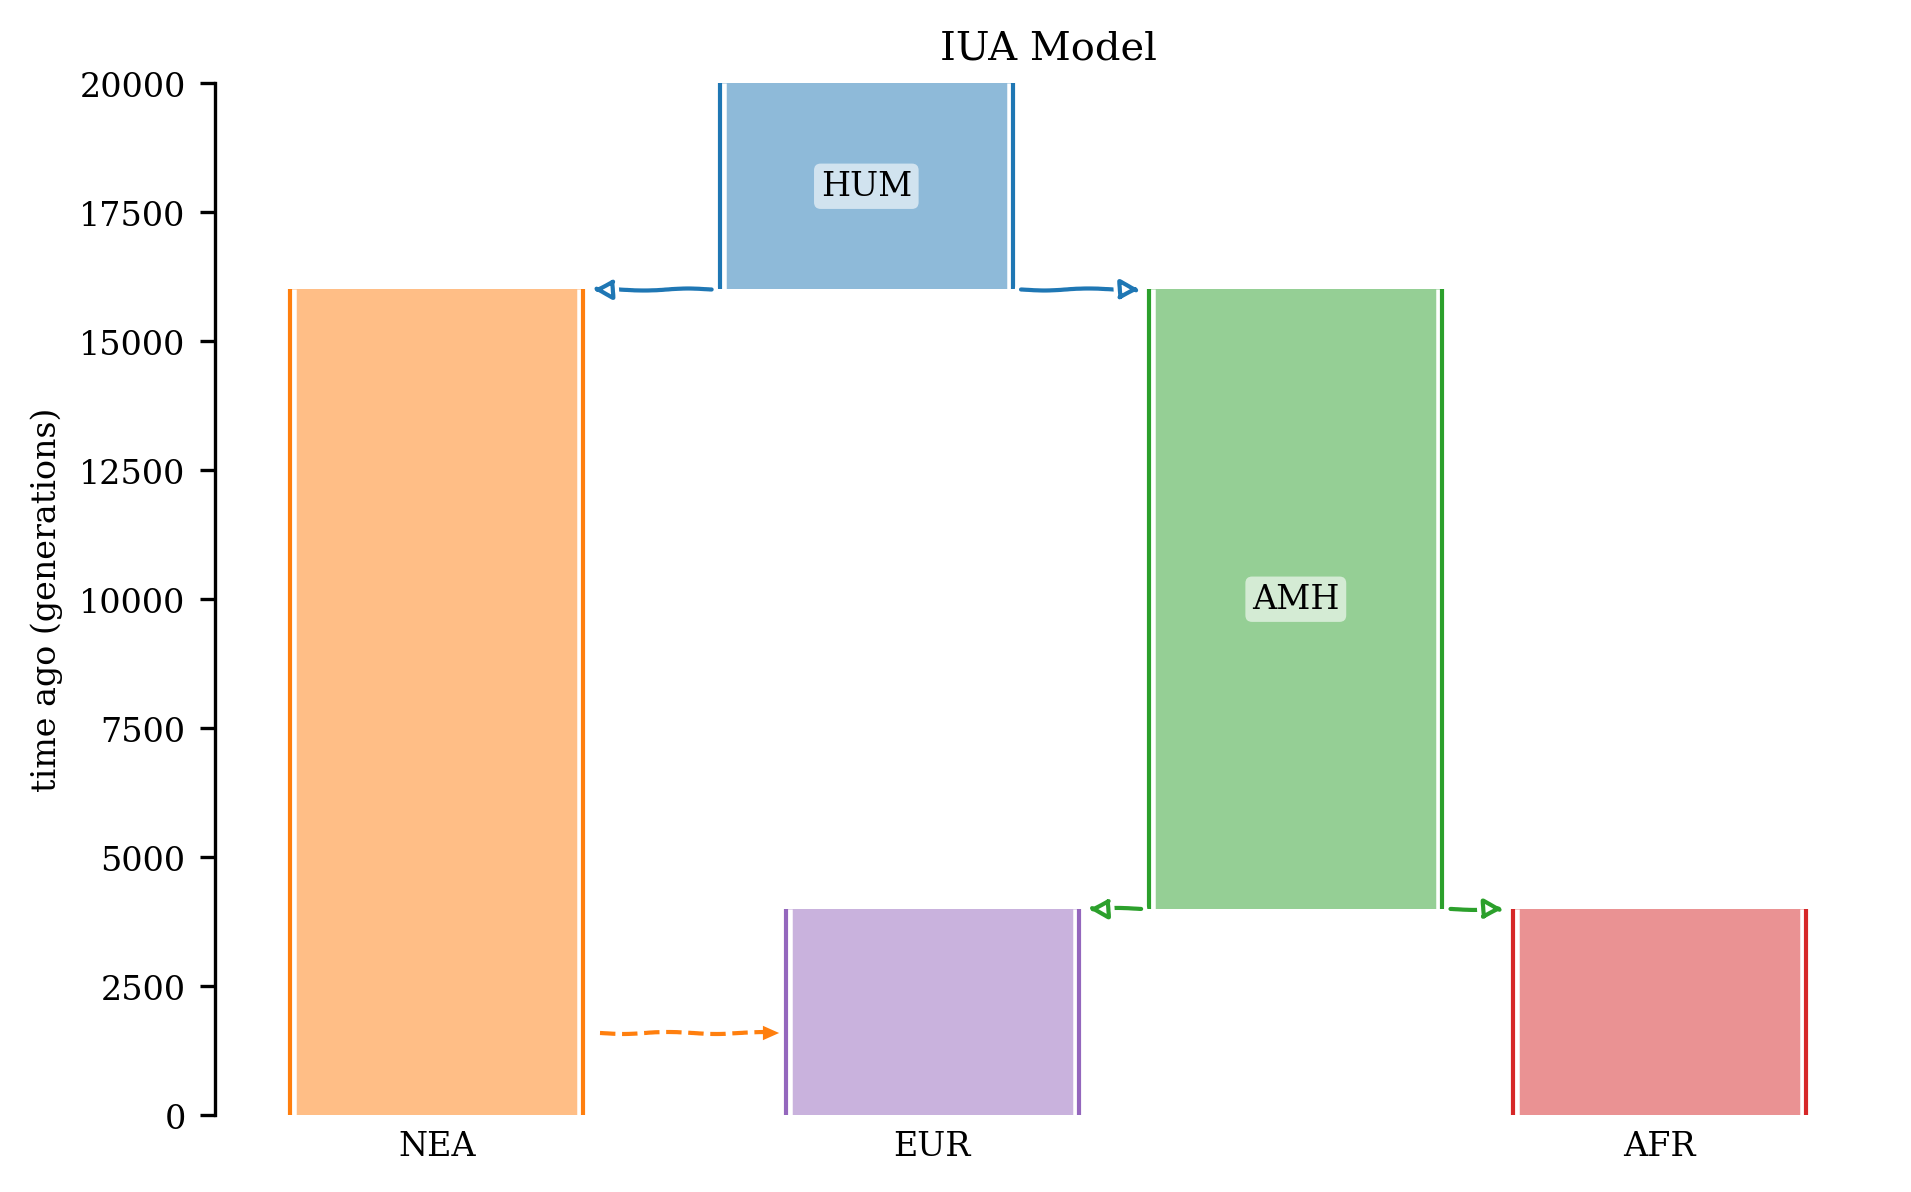

In [4]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig = plt.figure(
    figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)),
    facecolor='white', constrained_layout=True, dpi=300.0,
)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.tubes(iua_graph, ax=ax, title='IUA Model', seed=42)
# Export figure.
plt.savefig('../manuscript/figures/iua_model.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot.
plt.show()

In [5]:
# Check the demography debugger.
iua_demo.debug()

## Realistic Model of Human Evolution from Ragsdale & Gravel 2019
### Original Model
This is the unmodfied model imported from `stdpopsim`.

In [6]:
# Load the demes graph.
org_ooa_aa_graph = demes.load('./yamls/HomSap__OutOfAfricaArchaicAdmixture_5R19.yaml')
# Convert the graph to a demographic object.
org_ooa_aa_demo = msprime.Demography.from_demes(org_ooa_aa_graph)

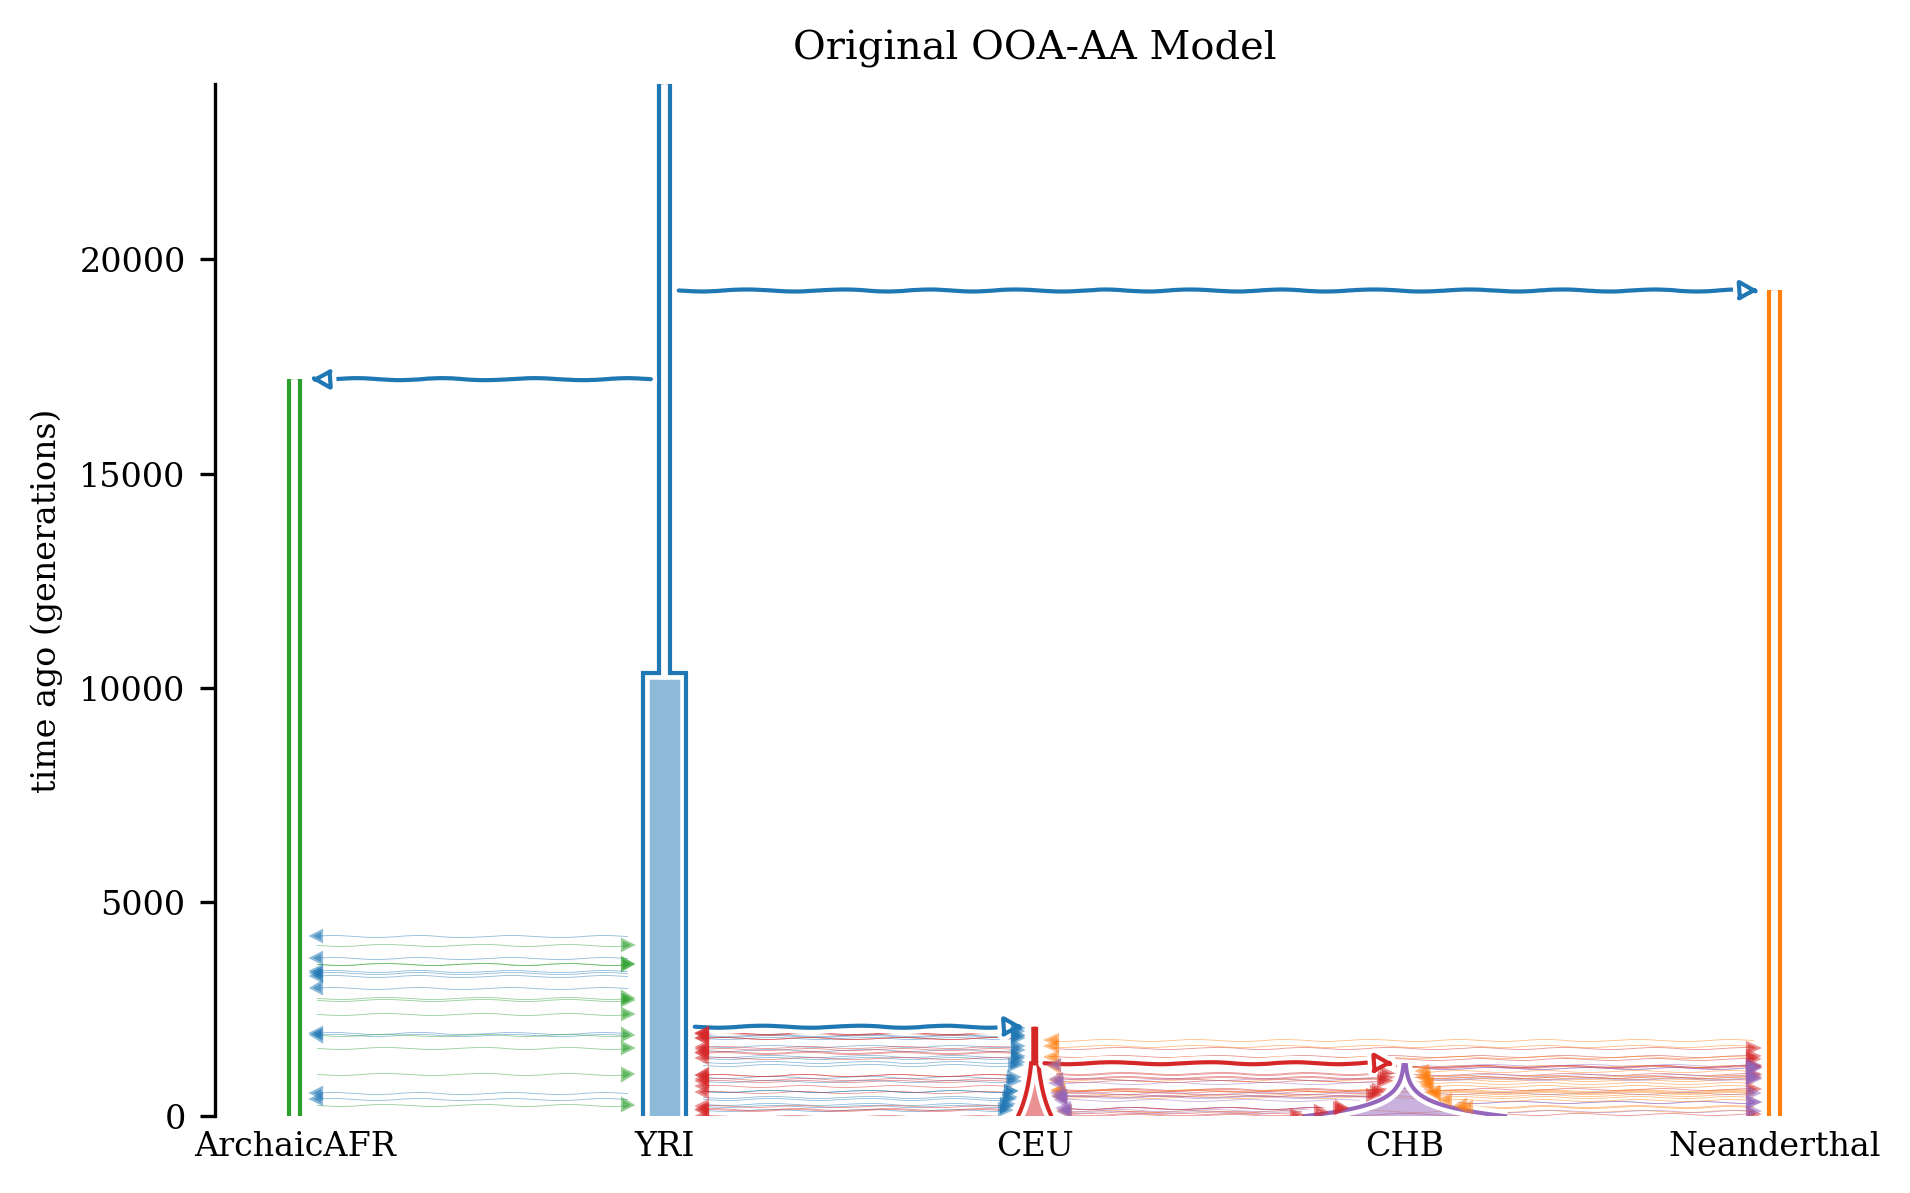

In [7]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig = plt.figure(
    figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)),
    facecolor='white', constrained_layout=True, dpi=300.0,
)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.tubes(org_ooa_aa_graph, ax=ax, title='Original OOA-AA Model', seed=42)
# Export figure.
plt.savefig('../manuscript/figures/org_ragsdale_model.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot.
plt.show()

In [8]:
# Check the demography debugger.
org_ooa_aa_demo.debug()

## Modified Model
The modifed model is the second primary model used in analyses. For simplicty, we changes the continuous bidirectional migration to three discrete pulse of introgression—one into the Eurasian populatuion and one into the CEU and CHB populatuions respectively. The times of the introgression events were determined by taking the midpoint of the original time periods of migrations involving Neanderthals. Lastly for a simulated admixture proportion ($f$) each distinct pulse of introgression was set to an admixture proportion of $\frac{f}{2}$ such that the CEU and CHB populatuions received a total simulated admixture proportion of $f$.

In [9]:
# Load the demes graph.
mod_ooa_aa_graph = demes.load('./yamls/ragsdale_f0.02.yaml')
# Convert the graph to a demographic object.
mod_ooa_aa_demo = msprime.Demography.from_demes(mod_ooa_aa_graph)

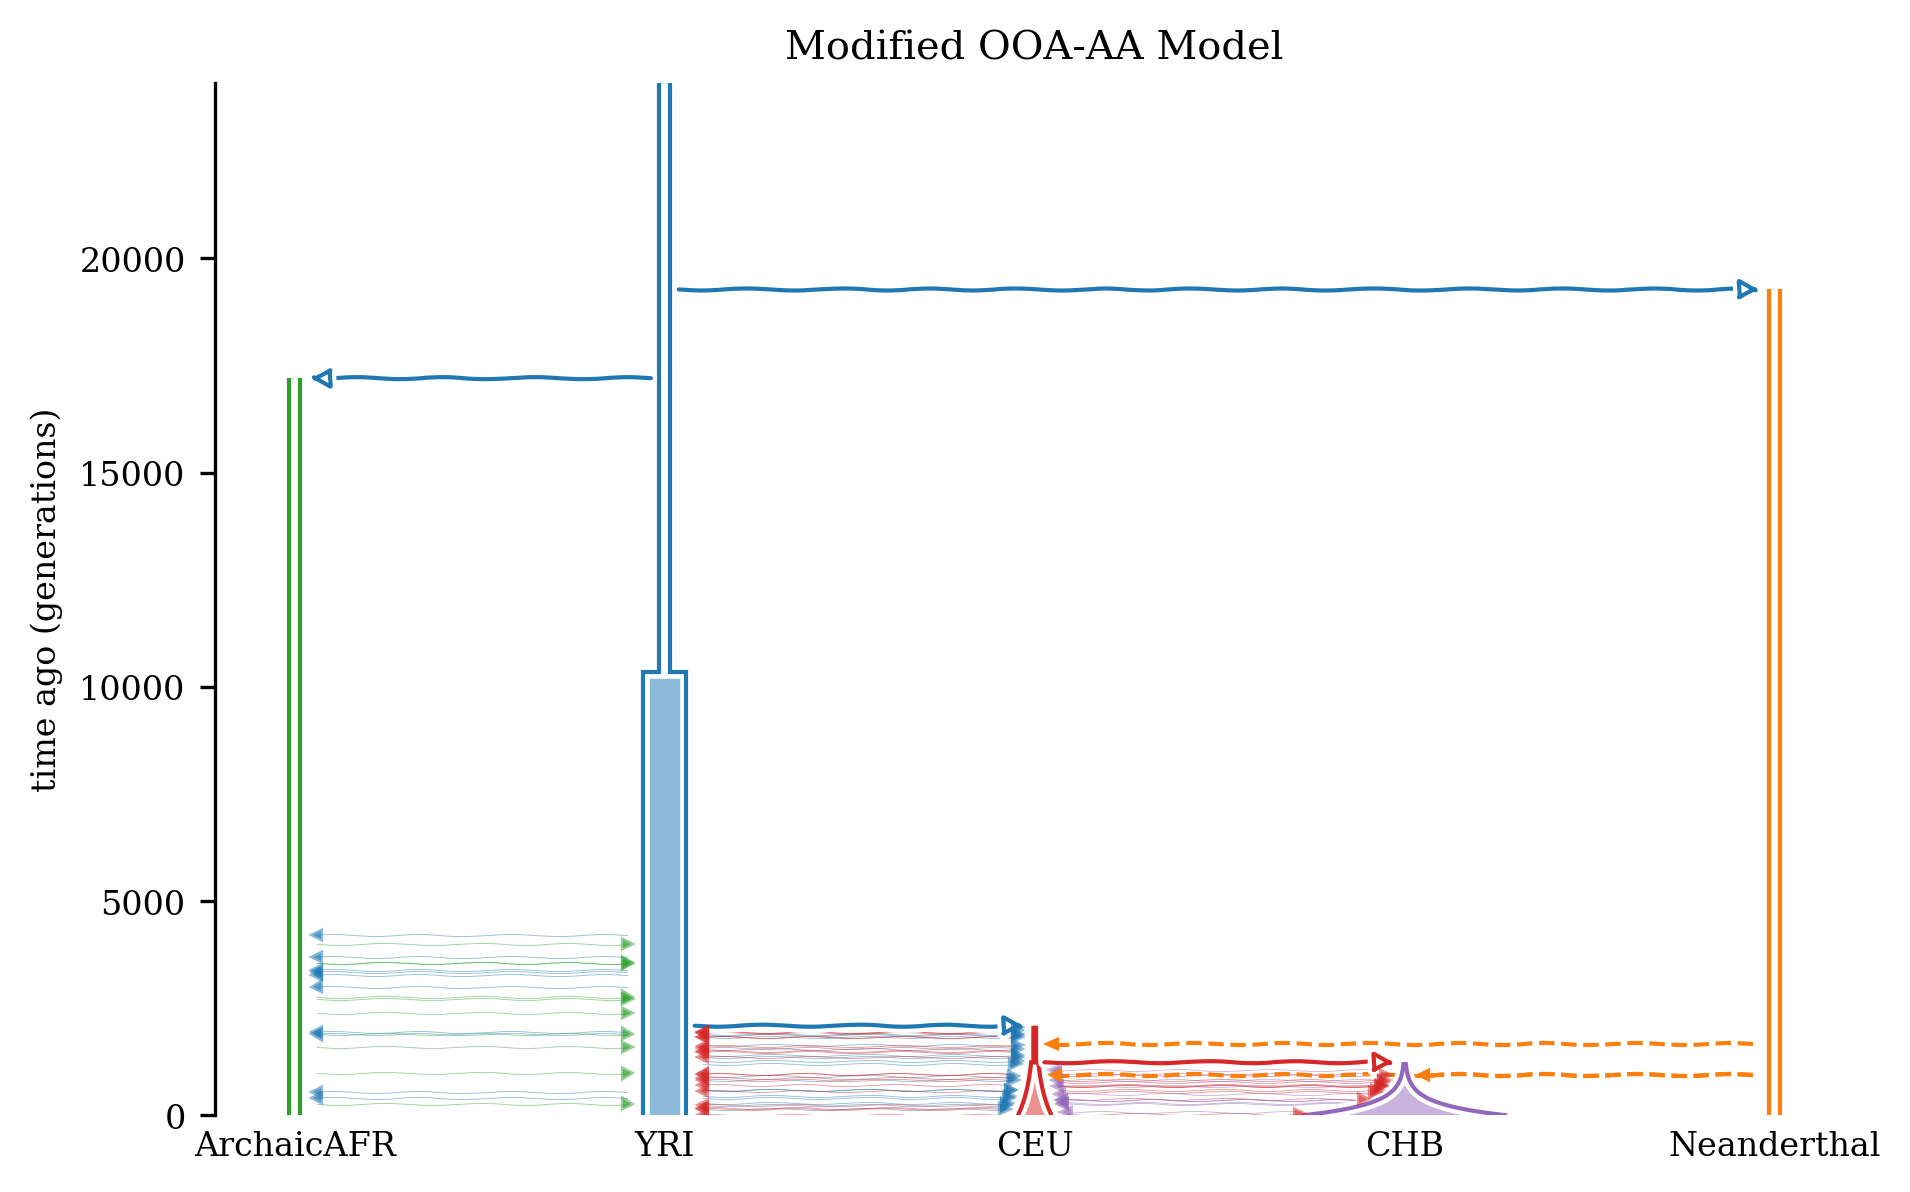

In [10]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig = plt.figure(
    figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)),
    facecolor='white', constrained_layout=True, dpi=300.0,
)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.tubes(mod_ooa_aa_graph, ax=ax, title='Modified OOA-AA Model', seed=42)
# Export figure.
plt.savefig('../manuscript/figures/mod_ragsdale_model.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot.
plt.show()

In [11]:
# Check the demography debugger.
mod_ooa_aa_demo.debug()

## Non-IUA Models
All of these models were used for supplemental analyses. The parameters were adjusted from the Rogers & Bohlender 2015 and Villanea and Schraiber 2019, with citations for specific parameters included in the comments.
### Multi-Pulse Model

In [12]:
# Load the demes graph.
multi_pulse_graph = demes.load('./yamls/multi_nea_0.02_den_0.01.yaml')
# Convert the graph to a demographic object.
multi_pulse_demo = msprime.Demography.from_demes(multi_pulse_graph)

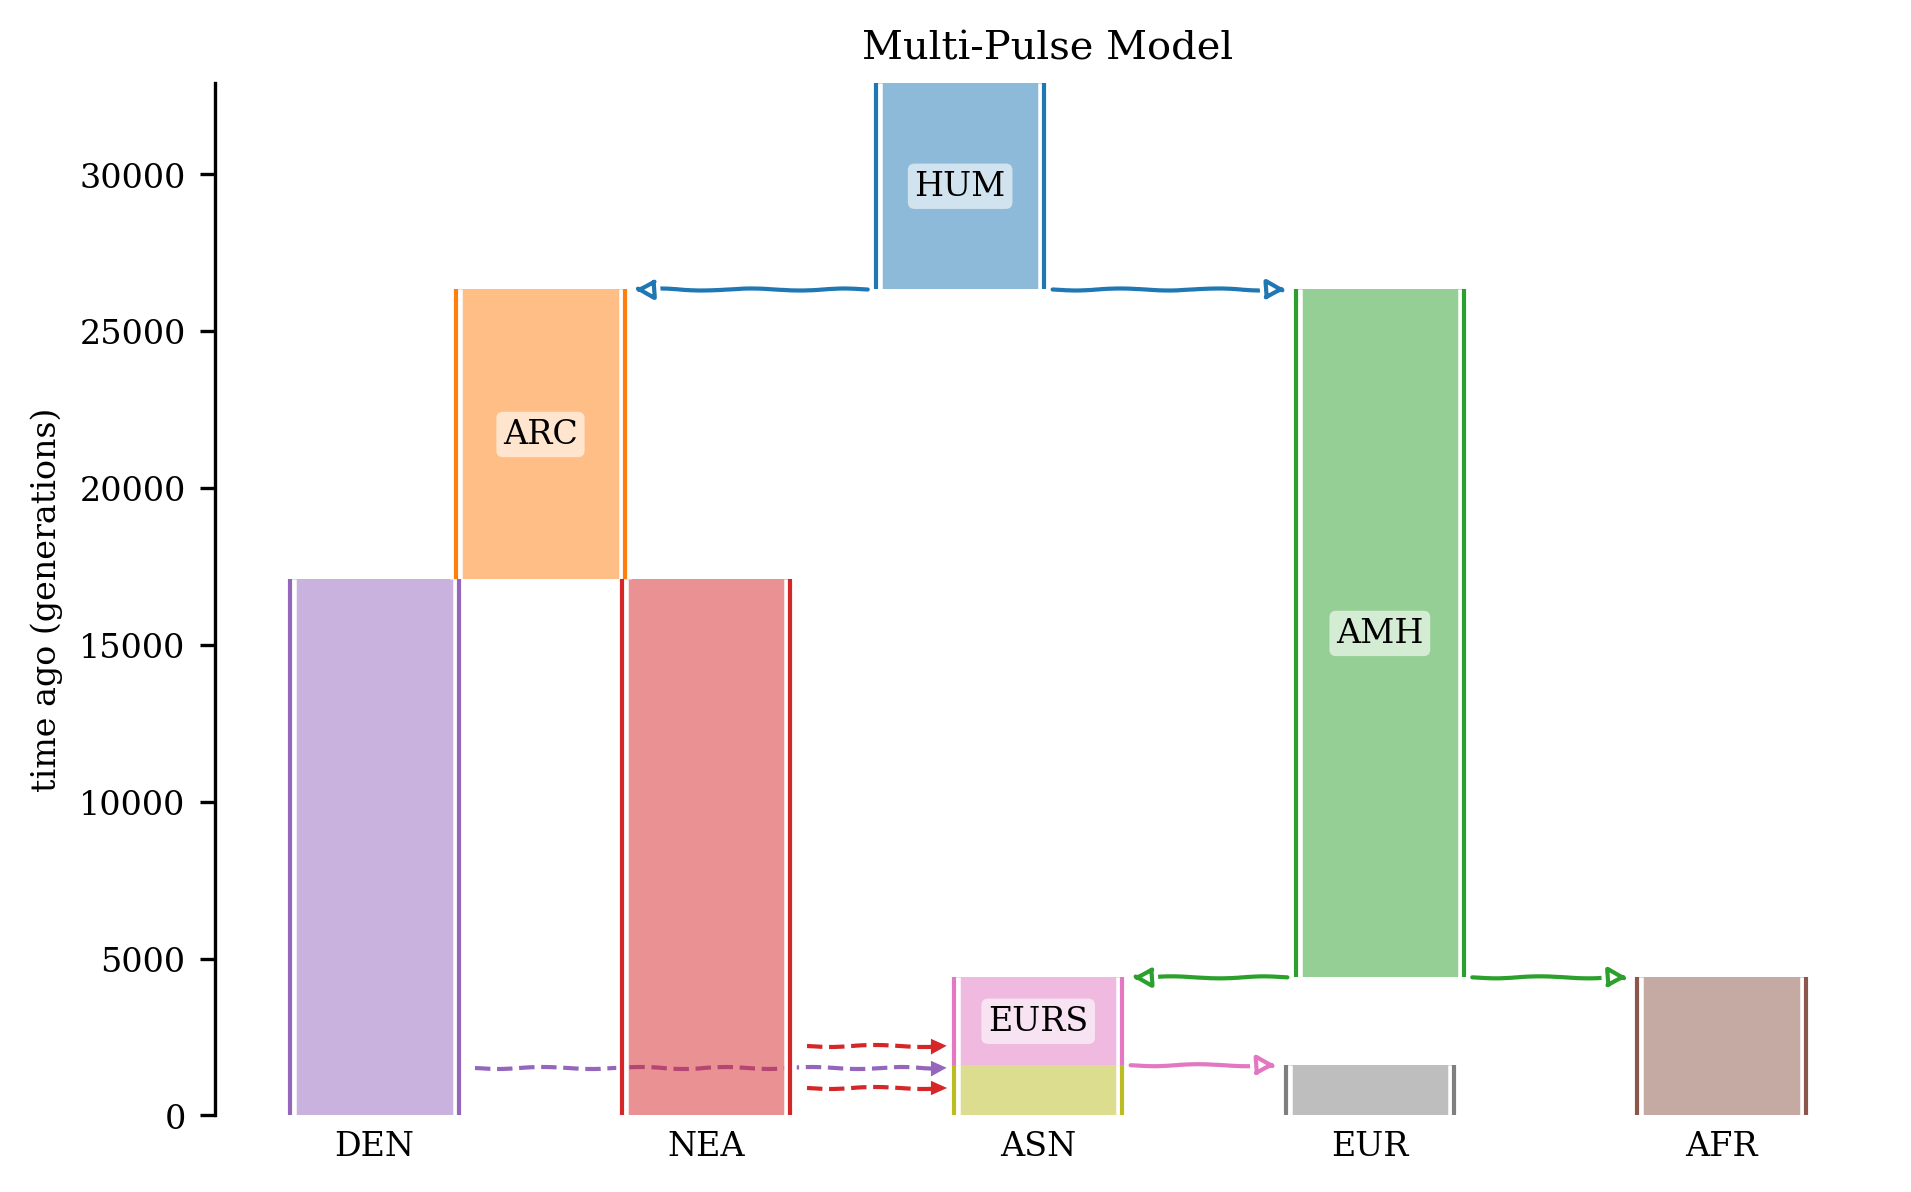

In [13]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig = plt.figure(
    figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)),
    facecolor='white', constrained_layout=True, dpi=300.0,
)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.tubes(multi_pulse_graph, ax=ax, title='Multi-Pulse Model', seed=42)
# Export figure.
plt.savefig('../manuscript/figures/multi_model.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot.
plt.show()

In [14]:
# Check the demography debugger.
multi_pulse_demo.debug()

### Basal Eurasian Multi-Pulse Model

In [15]:
# Load the demes graph.
basal_graph = demes.load('./yamls/basal_nea_0.02_den_0.01.yaml')
# Convert the graph to a demographic object.
basal_demo = msprime.Demography.from_demes(basal_graph)

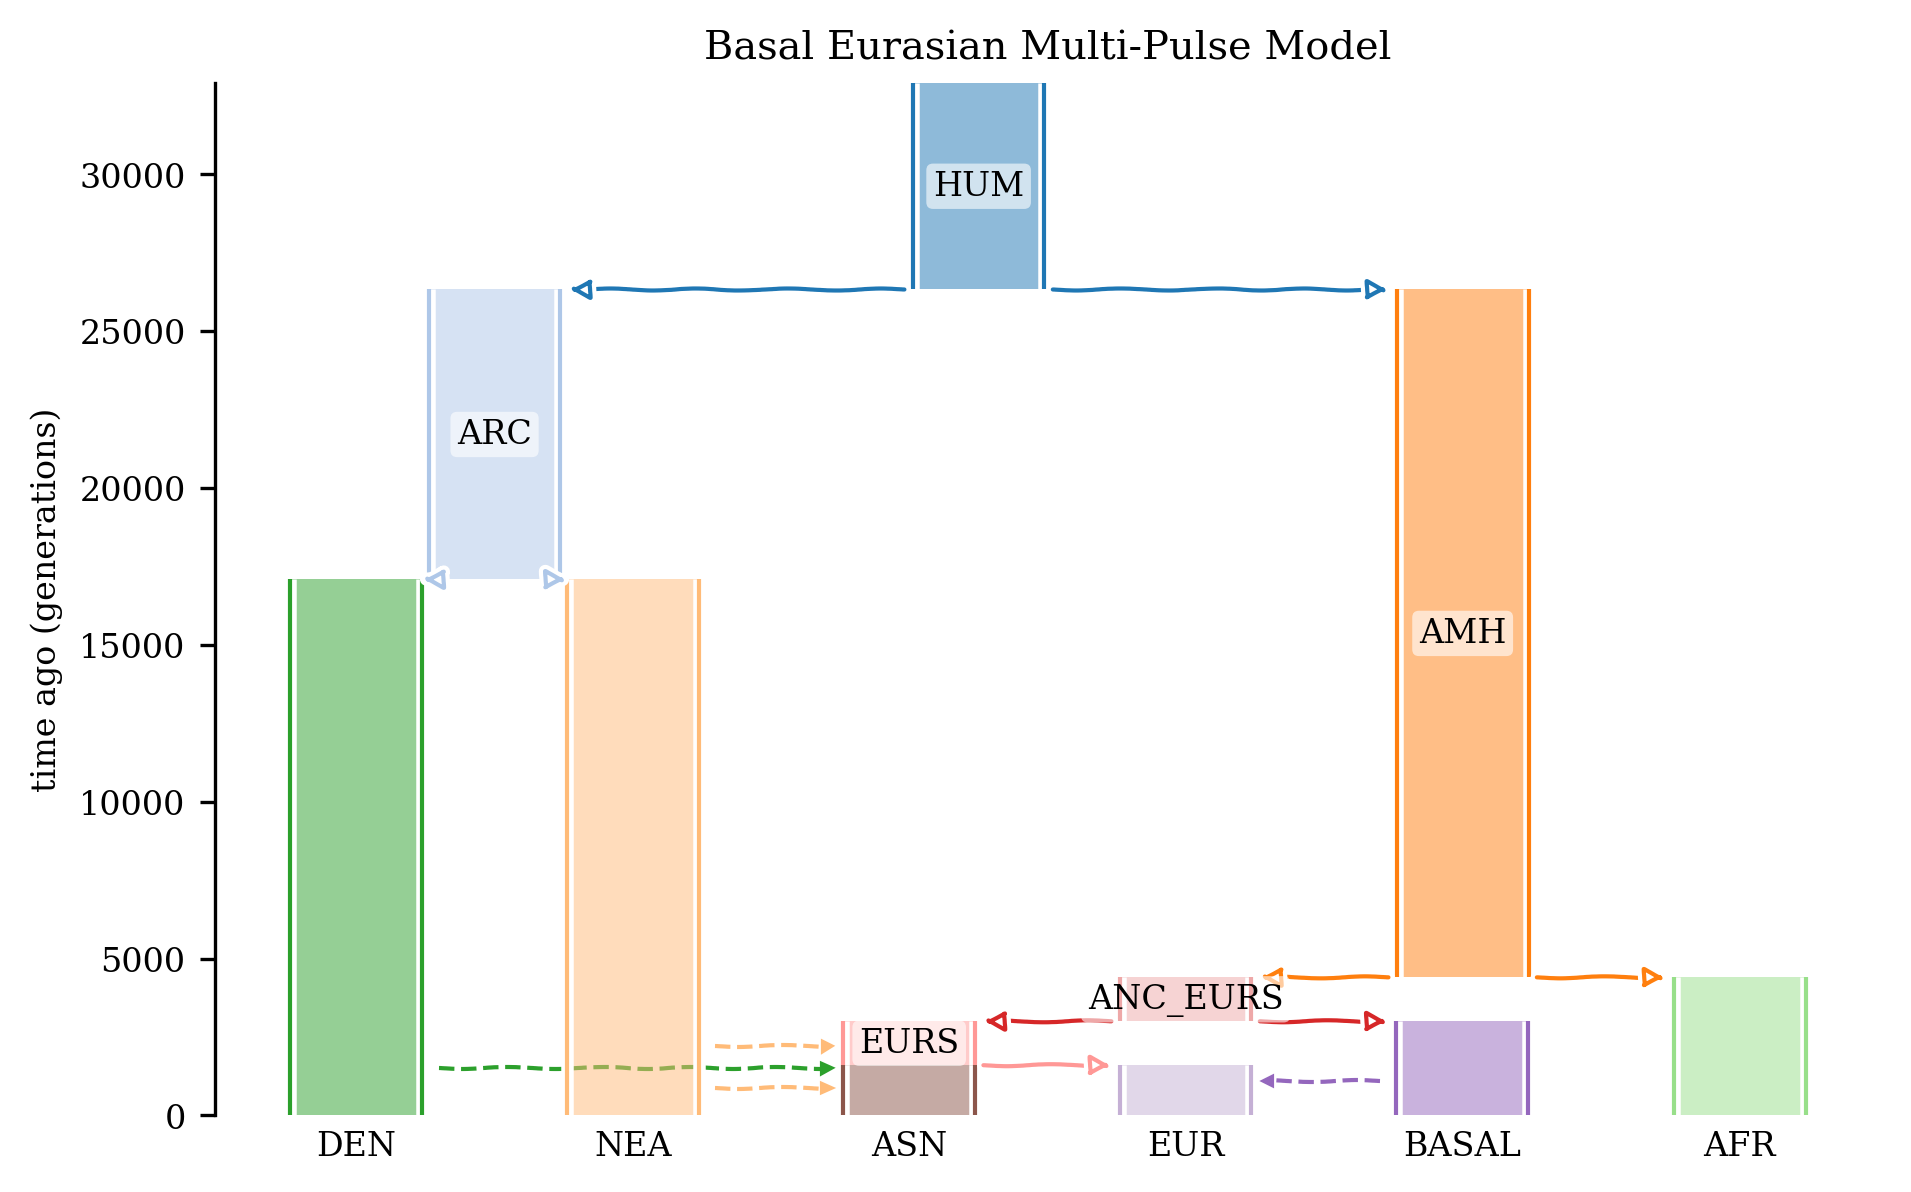

In [16]:
# Intialize the style.
plt.rcParams.update({'font.family': 'serif', 'font.size': 8})
# Intialize the figure.
fig = plt.figure(
    figsize=set_size(width_pt=452, fraction=1, subplots=(1, 1)),
    facecolor='white', constrained_layout=True, dpi=300.0,
)
# Intialize the axis.
ax = fig.add_subplot(111)
# Plot the demes graph.
demesdraw.tubes(basal_graph, ax=ax, title='Basal Eurasian Multi-Pulse Model', seed=42)
# Export figure.
plt.savefig('../manuscript/figures/basal_model.pdf', format='pdf', facecolor='white', bbox_inches='tight', dpi=300)
# Show the plot.
plt.show()

In [17]:
# Check the demography debugger.
basal_demo.debug()